In [1]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2020-11-23 13:33:35--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2020-11-23 13:33:35 (37.3 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [2]:
f=open("mini_classes.txt","r")
v=f.readlines()
f.close()

In [3]:
v=[c.replace('\n','').replace(' ','_') for c in v]

In [4]:
!mkdir data

In [ ]:
import urllib.request
d_url='https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
for i in v:        
    temp=i.replace('_', '%20')
    path=d_url+temp+'.npy'
    print(path)
    urllib.request.urlretrieve(path,'data/'+i+'.npy')
    

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy


In [ ]:
import os
import glob
import numpy as np
from tensorflow.python.keras import layers
from tensorflow import keras 
import tensorflow as tf

In [ ]:
print(len(os.listdir('data')))

In [ ]:
all_files=glob.glob(os.path.join('data', '*.npy'))
 
x=np.empty([0, 784])
y=np.empty([0])
print(x)
print(y)

class_names=[] 
for idx,file in enumerate(all_files):
    d=np.load(file)
    d=d[0:1,:]
    l=np.full(d.shape[0],idx)
    x=np.concatenate((x,d),axis=0)
    y=np.append(y,l)
    cn,ext=os.path.splitext(os.path.basename(file))
    class_names.append(cn)

permutation=np.random.permutation(y.shape[0])
x=x[permutation,:]
y=y[permutation]

vs=int(x.shape[0]/100*(.2*100))
x_test=x[0:vs,:]
y_test=y[0:vs]
x_train=x[vs:x.shape[0],:]
y_train=y[vs:y.shape[0]]

[]
[]


In [ ]:
nc=len(class_names)
print(nc)

100


In [ ]:
print(len(x_train))

80


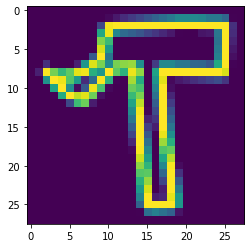

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

idx=randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28))

# print(class_names[int(y_train[idx].item())])

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train /= 255.0
x_test /= 255.0
#vectors to matrices
y_train=keras.utils.to_categorical(y_train,nc)
y_test=keras.utils.to_categorical(y_test,nc)

In [ ]:
# CNN model
model=keras.Sequential()
model.add(layers.Convolution2D(16, (3, 3),
                        padding='same',
                        input_shape=x_train.shape[1:],activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(32, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Convolution2D(64, (3, 3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='softmax')) 

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [ ]:
model.fit(x=x_train,y =y_train,validation_split=0.1,batch_size=256,verbose=2,epochs=10)

Epoch 1/10
1/1 - 0s - loss: 4.6052 - top_k_categorical_accuracy: 0.0556 - val_loss: 4.6073 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 2/10
1/1 - 0s - loss: 4.6042 - top_k_categorical_accuracy: 0.0694 - val_loss: 4.6105 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 3/10
1/1 - 0s - loss: 4.6029 - top_k_categorical_accuracy: 0.0694 - val_loss: 4.6144 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 4/10
1/1 - 0s - loss: 4.6012 - top_k_categorical_accuracy: 0.0694 - val_loss: 4.6196 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 5/10
1/1 - 0s - loss: 4.5989 - top_k_categorical_accuracy: 0.0694 - val_loss: 4.6267 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 6/10
1/1 - 0s - loss: 4.5957 - top_k_categorical_accuracy: 0.0694 - val_loss: 4.6366 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 7/10
1/1 - 0s - loss: 4.5914 - top_k_categorical_accuracy: 0.0694 - val_loss: 4.6502 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 8/10
1/1 - 0s - loss: 4.5857 - top_k_categ

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test accuarcy: {:0.2f}%'.format(score[1]*100))

Test accuarcy: 0.00%


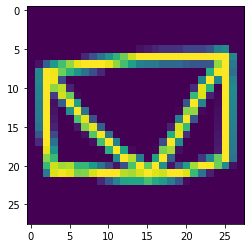

In [ ]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline

idx=randint(0,len(x_test))
img=x_test[idx]
plt.imshow(img.squeeze()) 

In [ ]:
p=model.predict(np.expand_dims(img,axis=0))[0]
idx=(-p).argsort()[:5]
sn=[class_names[i] for i in idx]
print(sn)

['line', 'pencil', 'eyeglasses', 'sock', 'hat']


In [ ]:
with open('class_names.txt','w') as file_handler:
    for i in class_names:
        file_handler.write("{}\n".format(i))

In [ ]:
!pip install tensorflowjs 

     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 112kB 20.6MB/s 
  Found existing installation: tensorflow-hub 0.10.0
    Uninstalling tensorflow-hub-0.10.0:
      Successfully uninstalled tensorflow-hub-0.10.0


In [ ]:
model.save('keras.h5')

In [ ]:
!mkdir model
!tensorflowjs_converter --input_format keras keras.h5 model/

mkdir: cannot create directory ‘model’: File exists
2020-11-20 14:08:39.397040: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [ ]:
!cp class_names.txt model/class_names.txt

In [ ]:
!zip -r model.zip model 

  adding: model/ (stored 0%)
  adding: model/group1-shard1of1.bin (deflated 8%)
  adding: model/model.json (deflated 82%)


In [ ]:
from google.colab import files
files.download('model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>